In [34]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 읽기

In [35]:
train_df = pd.read_csv("./data/titanic/train.csv")
test_df = pd.read_csv("./data/titanic/test.csv")
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

## 티켓 등급별 인원수 확인

In [36]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

## 위의 결과를 그래프로

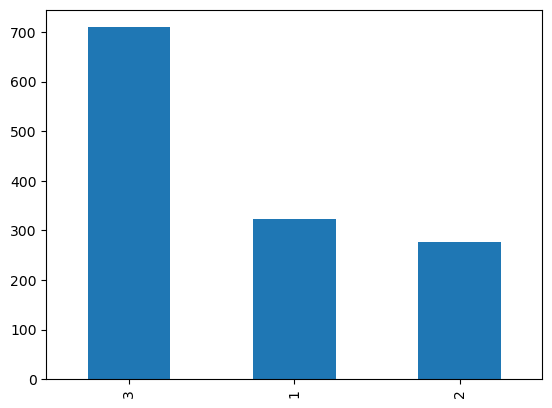

In [37]:
all_df.Pclass.value_counts().plot.bar()

## 티켓 등급별 요금 분포 확인하기

In [38]:
all_df[['Pclass', 'Fare']].groupby('Pclass').describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

## 티켓 등급별 요금 분포 시각화

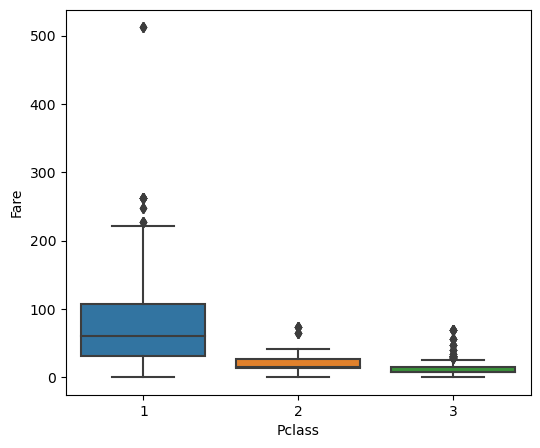

In [39]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass', y='Fare', data=all_df)

## Pclass2 변수 생성하기

In [40]:
all_df['Pclass2'] = all_df['Pclass']

## Fare 가 109 보다 큰 것을 0으로

In [41]:
all_df.loc[all_df['Fare'] > 109, 'Pclass2'] = 0
all_df[all_df['Pclass2']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0


## 연령 분포 확인

In [42]:
all_df[['Pclass2', 'Age']].groupby('Pclass2').describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Pclass2                                                           
0         73.0  35.676986  15.447150  0.92  25.0  35.0  47.0  67.0
1        211.0  40.364929  14.061667  4.00  30.0  40.0  50.0  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.0  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.0  74.0

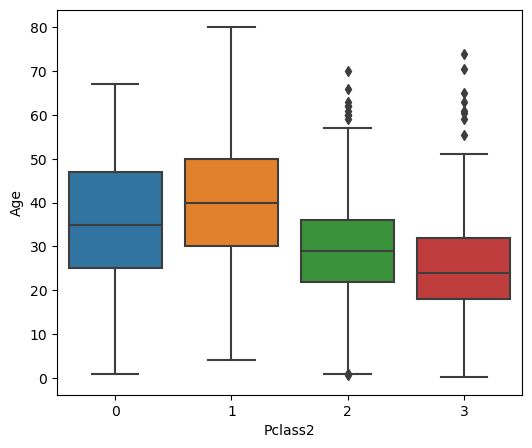

In [43]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass2', y='Age', data=all_df)

## 15세 이상을 대상으로 티켓 등급 확인

In [44]:
all_df[all_df['Age'] > 15][['Pclass2', 'Age']].groupby('Pclass2').describe()

Age                                                      
         count       mean        std   min    25%   50%    75%   max
Pclass2                                                             
0         66.0  38.522727  13.244573  17.0  28.25  36.0  48.75  67.0
1        210.0  40.538095  13.867917  16.0  30.00  40.0  50.00  80.0
2        233.0  32.369099  11.363367  16.0  24.00  30.0  39.00  70.0
3        422.0  28.200237   9.634512  16.0  21.00  26.0  33.00  74.0

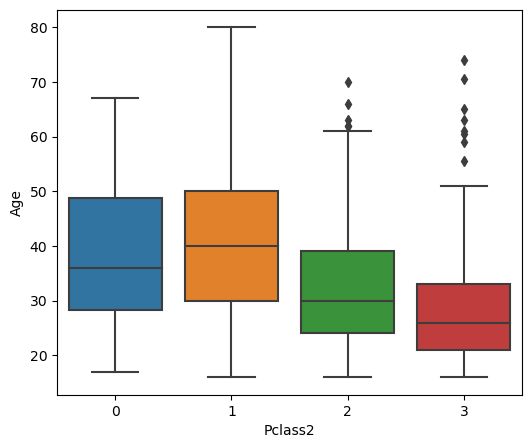

In [45]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass2', y='Age', data=all_df[all_df['Age'] > 15])

## 연령과 티켓의 요금 분포 확인

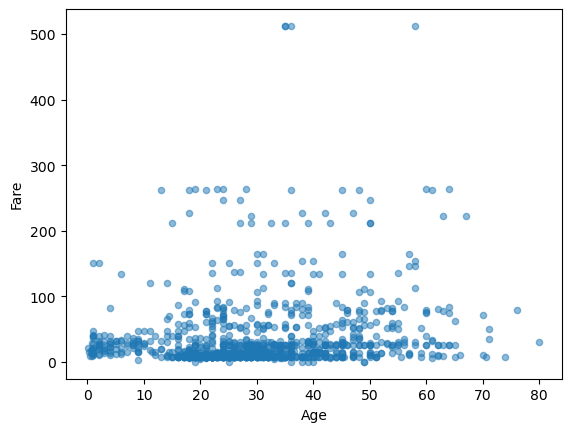

In [46]:
all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)

## 티켓 등급에 따라 승선 가족 수에 차이가 있는지 확인

In [47]:
all_df['family_num'] = all_df['SibSp'] + all_df['Parch']
all_df[['Pclass2', 'family_num']].groupby('Pclass2').describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             78.0  1.576923  1.558548  0.0  0.0  1.0  2.0   5.0
1            245.0  0.555102  0.685046  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

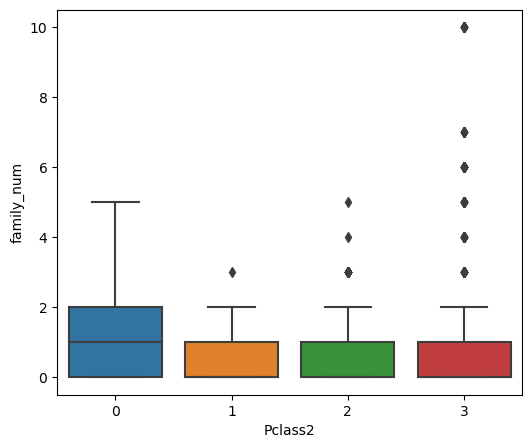

In [48]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass2', y='family_num', data=all_df)

## 티켓 등급별 남여 비율 확인

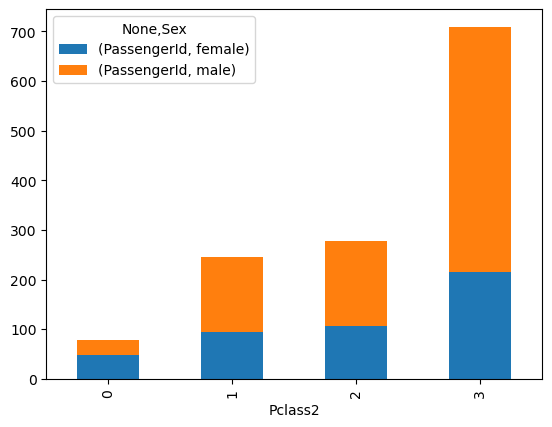

In [49]:
Pclass_gender_df = all_df[['Pclass2', 'Sex', 'PassengerId']].dropna().groupby(['Pclass2', 'Sex']).count().unstack()
Pclass_gender_df.plot.bar(stacked=True)

In [50]:
Pclass_gender_df['male_ratio'] = Pclass_gender_df['PassengerId', 'male'] / (Pclass_gender_df['PassengerId', 'male'] + Pclass_gender_df['PassengerId', 'female'])
Pclass_gender_df

PassengerId      male_ratio
Sex          female male           
Pclass2                            
0                49   29   0.371795
1                95  150   0.612245
2               106  171   0.617329
3               216  493   0.695346

## 항구별 차이 확인

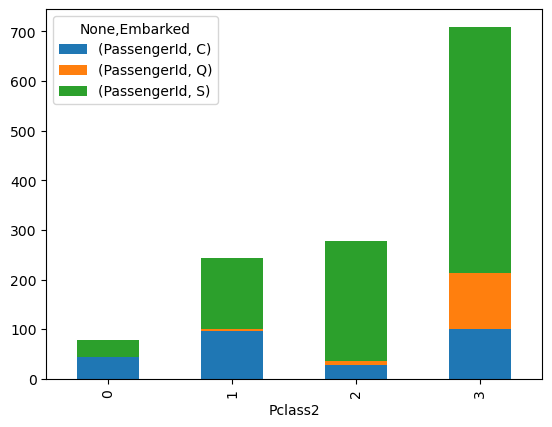

In [51]:
Pclass_emb_df = all_df[['Pclass2', 'Embarked', 'PassengerId']].dropna().groupby(['Pclass2', 'Embarked']).count().unstack()
Pclass_emb_df = Pclass_emb_df.fillna(0)
Pclass_emb_df.plot.bar(stacked=True)

## 100% 누적 막대 그래프로 변환

In [52]:
Pclass_emb_df_ratio = Pclass_emb_df.copy()
Pclass_emb_df_ratio['sum'] = \
    Pclass_emb_df_ratio['PassengerId', 'C'] + \
    Pclass_emb_df_ratio['PassengerId', 'Q'] + \
    Pclass_emb_df_ratio['PassengerId', 'S']
Pclass_emb_df_ratio['PassengerId', 'C'] = Pclass_emb_df_ratio['PassengerId', 'C'] / Pclass_emb_df_ratio['sum']
Pclass_emb_df_ratio['PassengerId', 'Q'] = Pclass_emb_df_ratio['PassengerId', 'Q'] / Pclass_emb_df_ratio['sum']
Pclass_emb_df_ratio['PassengerId', 'S'] = Pclass_emb_df_ratio['PassengerId', 'S'] / Pclass_emb_df_ratio['sum']
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop(['sum'], axis=1)
Pclass_emb_df_ratio

PassengerId                    
Embarked           C         Q         S
Pclass2                                 
0           0.564103  0.000000  0.435897
1           0.399177  0.012346  0.588477
2           0.101083  0.025271  0.873646
3           0.142454  0.159379  0.698166

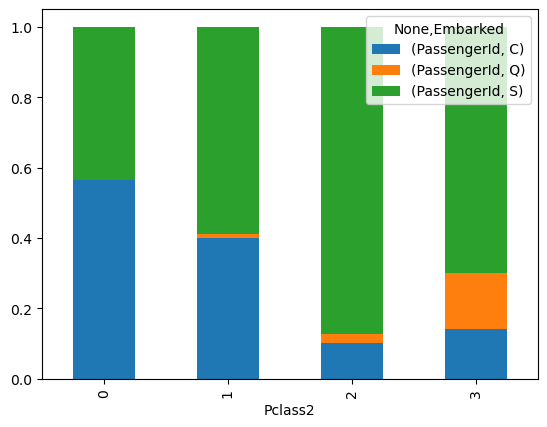

In [53]:
Pclass_emb_df_ratio.plot.bar(stacked=True)

## Cherbourg 에서 혼자 승선한 젊은 승객 이라는 그룹의 특징 분석

In [54]:
C_young10 = all_df[(all_df['Embarked'] == 'C') & (all_df['Age'] // 10 == 1) & (all_df['family_num'] == 0)]
C_young20 = all_df[(all_df['Embarked'] == 'C') & (all_df['Age'] // 10 == 2) & (all_df['family_num'] == 0)]
print(len(C_young10))
print(len(C_young20))

7
31


## 전체 승객에서 Cherbourng 에서 홀로 승선한 10대 승객 분포

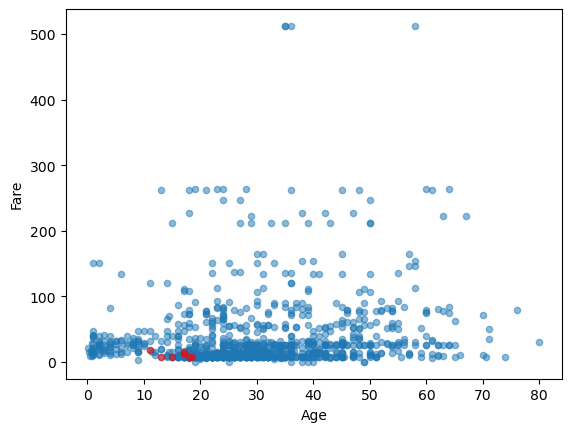

In [55]:
ax = all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young10.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

## 홀로 승선한 모든 승객 중 Cherbourg 에서 승선한 승객 분포

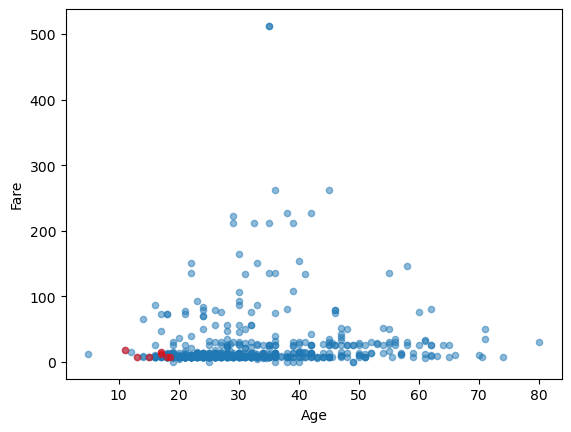

In [56]:
ax = all_df[all_df['family_num'] == 0].plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young10.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

## Cherbourg 에서 홀로 승선한 20대 승객 분포

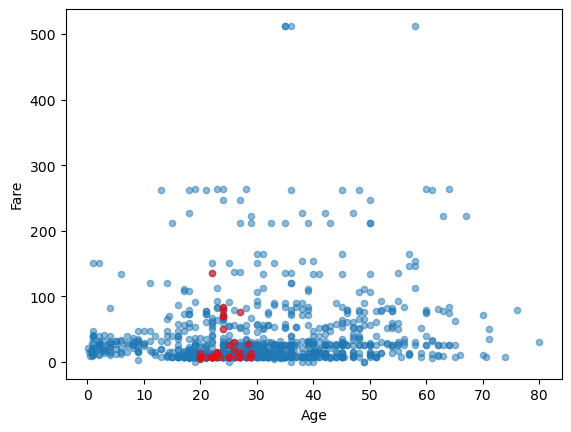

In [57]:
ax = all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young20.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

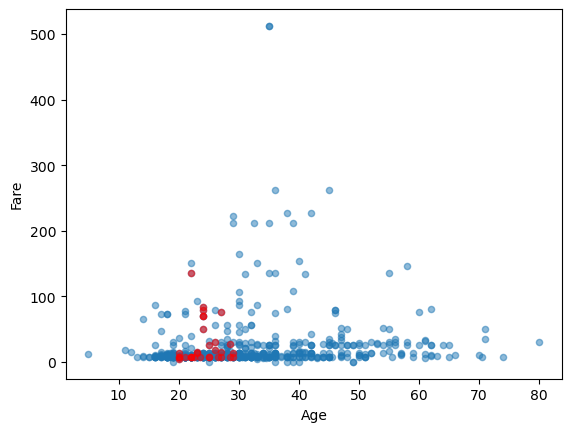

In [58]:
ax = all_df[all_df['family_num'] == 0].plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young20.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

## Cherbourg 승객을 전체 중에서 표시

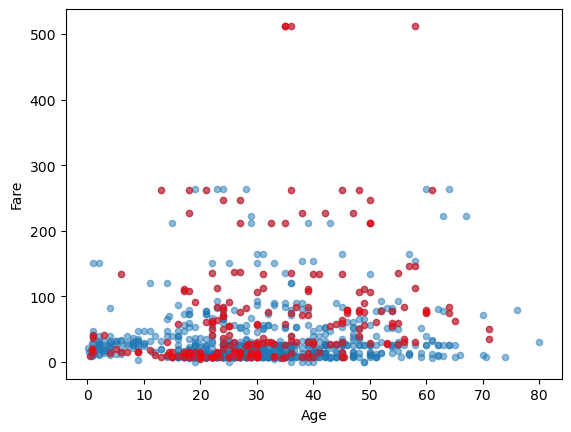

In [59]:
C_all = all_df[(all_df['Embarked']=='C')]
ax = all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
C_all.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

## 각 항구의 10대이면서 1인 승객 평균 요금

In [63]:
all_df[(all_df['Age'] // 10 == 1) & (all_df['family_num'] == 0)][['Embarked', 'Fare']].groupby('Embarked').mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712
